# DataSet Example Notebook
-----------------

In [2]:
import qcodes as qc
import pprint as pp
import utils
from plots import ScanPlotFromDataSet
%matplotlib ipympl
from IPython.display import Image

In [3]:
data = qc.load_data('data/2018-06-06/#002_scan_09-29-05')

In [4]:
data

DataSet:
   location = 'data/2018-06-06/#002_scan_09-29-05'
   <Type>   | <array_id>             | <array.name> | <array.shape>
   Setpoint | benders_position_x_set | position_x   | (50,)
   Setpoint | index0_set             | index0       | (50, 4)
   Setpoint | index1_set             | index1       | (50, 4, 50)
   Measured | daq_ai_voltage         | voltage      | (50, 4, 50)

### Generate interactive plot like the one created during the scan:

In [5]:
scan_plot = ScanPlotFromDataSet(data)

FigureCanvasNbAgg()

### Display plot as image (not interactive):

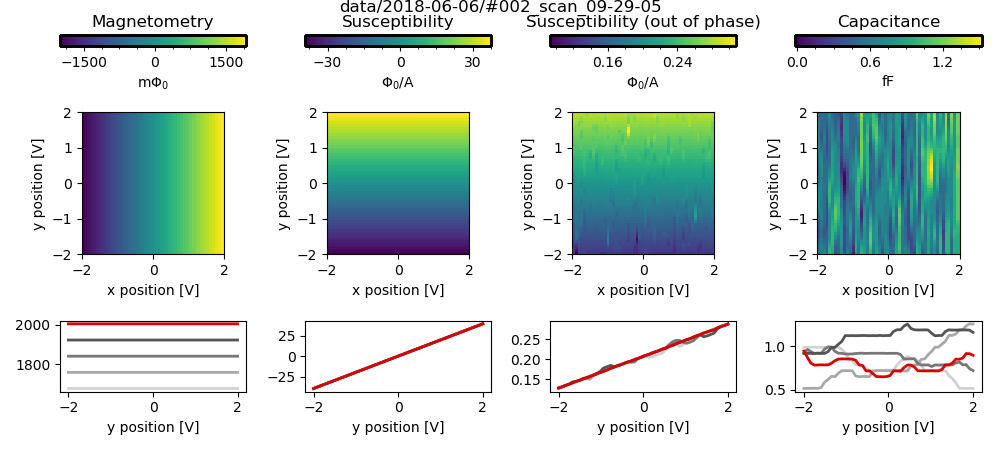

In [6]:
Image(filename=data.location + '/' + data.metadata['loop']['metadata']['fname'] + '.png')

## Explore DataSet metadata
----------------------

In [7]:
print(list(data.metadata.keys()))
print(list(data.metadata['station'].keys()))
print(list(data.metadata['loop']['metadata'].keys()))

['station', 'loop', '__class__', 'location', 'arrays', 'formatter', 'io']
['instruments', 'parameters', 'components', 'default_measurement']
['fname', 'dir', 'fast_ax', 'range', 'center', 'height', 'scan_rate', 'scan_size', 'channels', 'prefactors']


### Measurement loop metadata

In [8]:
pp.pprint(data.metadata['loop']['metadata']['channels'])

{'CAP': {'ai': 3,
         'gain': 1,
         'label': 'Capacitance',
         'lockin': {'amplitude': '1 V',
                    'frequency': '18.437 kHz',
                    'name': 'CAP'},
         'unit': 'fF',
         'unit_latex': 'fF'},
 'MAG': {'ai': 0,
         'filters': {'highpass': {'cutoff': '0 Hz', 'slope': '0 dB/octave'},
                     'lowpass': {'cutoff': '30 kHz', 'slope': '12 dB/octave'}},
         'gain': 1,
         'label': 'Magnetometry',
         'unit': 'mPhi0',
         'unit_latex': 'm$\\Phi_0$'},
 'SUSCX': {'ai': 1,
           'gain': 1,
           'label': 'Susceptibility',
           'lockin': {'amplitude': '1 V',
                      'frequency': '131.79 Hz',
                      'name': 'SUSC'},
           'r_lead': '1 kOhm',
           'unit': 'Phi0/A',
           'unit_latex': '$\\Phi_0$/A'},
 'SUSCY': {'ai': 2,
           'gain': 1,
           'label': 'Susceptibility (out of phase)',
           'lockin': {'name': 'SUSC'},
           'r_le

In [9]:
data.metadata['loop']['metadata']['prefactors']

{'MAG': '1.0 Phi0 / volt',
 'SUSCX': '0.02 Phi0 * kiloOhm / volt ** 2',
 'SUSCY': '0.02 Phi0 * kiloOhm / volt ** 2',
 'CAP': '1.5337423312883435e-07 picofarad / microvolt'}

### Instrument snapshots

In [10]:
SUSC_snap = data.metadata['station']['instruments']['SUSC_lockin']
for name, param in SUSC_snap['parameters'].items():
    if 'value' in param.keys():
        print(name, param['value'], param['unit'])

IDN {'vendor': 'Stanford_Research_Systems', 'model': 'SR830', 'serial': 's/n53956', 'firmware': 'ver1.07'} 
timeout 5.0 s
phase -144.83 deg
reference_source internal 
frequency 131.79 Hz
ext_trigger TTL rising 
harmonic 1 
amplitude 1.0 V
input_config a 
input_shield float 
input_coupling AC 
notch_filter off 
sensitivity 0.2 V
reserve normal 
time_constant 0.01 s
filter_slope 24 dB/oct
sync_filter off 
X_offset [0.0, 0] 
Y_offset [0.0, 0] 
R_offset [0.0, 0] 
aux_in1 -0.000333333 V
aux_out1 -0.423 V
aux_in2 0.004 V
aux_out2 0.107 V
aux_in3 0.005 V
aux_out3 0.0 V
aux_in4 0.0126667 V
aux_out4 0.0 V
output_interface GPIB 
ch1_ratio none 
ch1_display X 
ch2_ratio none 
ch2_display Y 
X 0.0 V
Y -7.62945e-06 V
R 0.0 V
P 0.0 deg
buffer_SR 1 Hz
buffer_acq_mode single shot 
buffer_trig_mode OFF 
buffer_npts 0 


## Convert DataSet to arrays with real units
----------------------

### Leave everything in DAQ voltage units

In [11]:
arrays = utils.to_arrays(data, real_units=False)

In [12]:
for name, array in arrays.items():
    print((name, array.units))

('X', <Unit('volt')>)
('Y', <Unit('volt')>)
('x', <Unit('volt')>)
('y', <Unit('volt')>)
('MAG', <Unit('volt')>)
('SUSCX', <Unit('volt')>)
('SUSCY', <Unit('volt')>)
('CAP', <Unit('volt')>)


### Convert $z$-data to real units, but leave $x$ and $y$ as voltages

In [13]:
arrays = utils.to_arrays(data, real_units=True)

In [14]:
for name, array in arrays.items():
    print((name, array.units))

('X', <Unit('volt')>)
('Y', <Unit('volt')>)
('x', <Unit('volt')>)
('y', <Unit('volt')>)
('MAG', <Unit('milliPhi0')>)
('SUSCX', <Unit('Phi0 / ampere')>)
('SUSCY', <Unit('Phi0 / ampere')>)
('CAP', <Unit('femtofarad')>)


### Convert $z$-data to real units and $x$, $y$ to $\mu\mathrm{m}$:

In [15]:
arrays = utils.to_arrays(data, real_units=True, xy_unit='um')

In [16]:
for name, array in arrays.items():
    print((name, array.units))

('X', <Unit('micrometer')>)
('Y', <Unit('micrometer')>)
('x', <Unit('micrometer')>)
('y', <Unit('micrometer')>)
('MAG', <Unit('milliPhi0')>)
('SUSCX', <Unit('Phi0 / ampere')>)
('SUSCY', <Unit('Phi0 / ampere')>)
('CAP', <Unit('femtofarad')>)


In [17]:
print((arrays['x'].magnitude[0], arrays['x'].units))

(-34.0, <Unit('micrometer')>)


### Convert $z$-data to real units and $x$, $y$ to $\mathrm{nm}$:

In [18]:
arrays = utils.to_arrays(data, real_units=True, xy_unit='nm')

In [19]:
for name, array in arrays.items():
    print((name, array.units))

('X', <Unit('nanometer')>)
('Y', <Unit('nanometer')>)
('x', <Unit('nanometer')>)
('y', <Unit('nanometer')>)
('MAG', <Unit('milliPhi0')>)
('SUSCX', <Unit('Phi0 / ampere')>)
('SUSCY', <Unit('Phi0 / ampere')>)
('CAP', <Unit('femtofarad')>)


In [20]:
print((arrays['x'].magnitude[0], arrays['x'].units))

(-33999.999999999993, <Unit('nanometer')>)


## Export data to, e.g., a MAT file:
-------------------

In [21]:
utils.scan_to_mat_file(data, real_units=True, xy_unit='um')

In [22]:
utils.scan_to_mat_file(data, real_units=True, xy_unit=None)

In [23]:
utils.scan_to_mat_file(data, real_units=False)